# **Haberman dataset analysis**
description of dataset from(https://www.kaggle.com/gilsousa/habermans-survival-data-set) tells  about the survival of patients who  undergwent breast cancer surgery.In this data set the independent variable is "status" (which tells whether the patient survived or not ) and the dependent variables are age (the age when the patient underwent surgery) , year (the year when surgery was performed), nodes (no. of nodes present).Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


In [3]:
#importing basic libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importing data
data = pd.read_csv("haberman.csv")
data

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [5]:
data.shape

(306, 4)

In [6]:
data.isnull()

,age,year,nodes,status
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
301,False,False,False,False
302,False,False,False,False
303,False,False,False,False
304,False,False,False,False


we can see that there are total 306 rows and the complete data set has no null values

In [7]:
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

so as we can see the patient who survived for longer period are more than the patients who survived for shorter period .

##Univarient analysis

Age

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


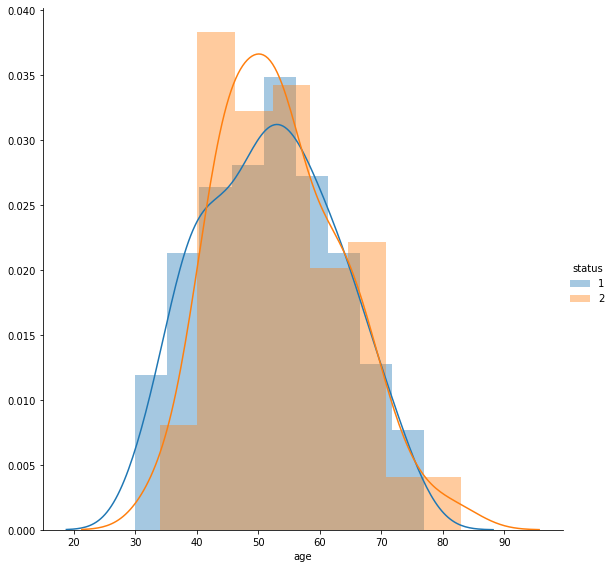

In [8]:

sns.FacetGrid(data,hue="status", size=8)\
.map(sns.distplot,"age")\
.add_legend()



observation:-


1. patients with age greater than 75 had lower probability to survive longer  
2. patients with age less than 40 have greater chance of surviving longer.



operational year

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


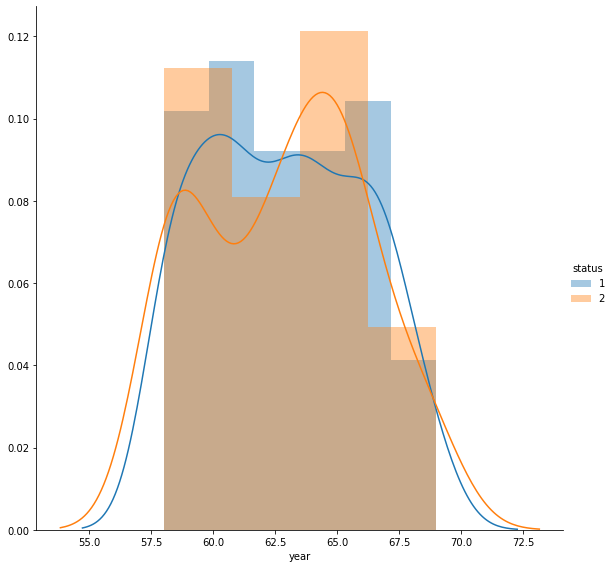

In [9]:

sns.FacetGrid(data,hue="status", size=8)\
.map(sns.distplot,"year")\
.add_legend()

Auxillary Nodes

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


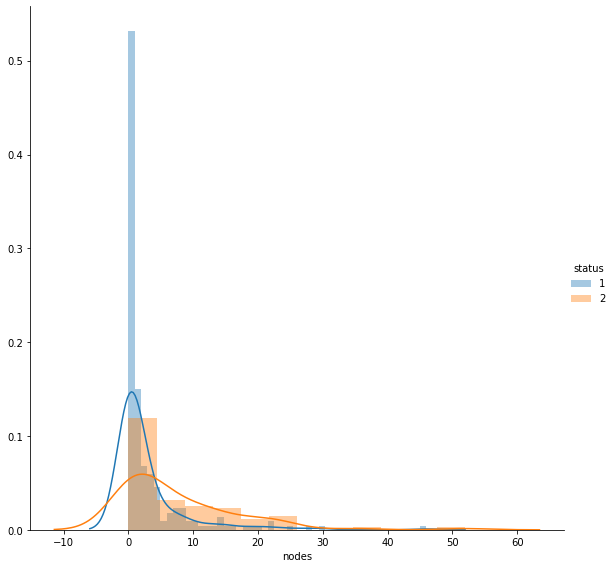

In [10]:

sns.FacetGrid(data,hue="status", size=8)\
.map(sns.distplot,"nodes")\
.add_legend()



people having auxiallary nodes 

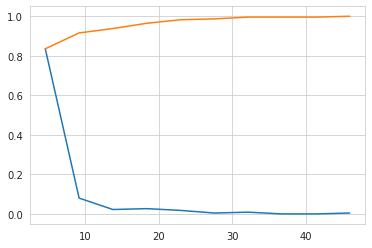

In [16]:
data_long = data.loc[data["status"] == 1]
data_short = data.loc[data["status"] == 2]
count , binedges =  np.histogram(data_long["nodes"], bins=10, 
                                 density = True)
count1 , binedges1 =  np.histogram(data_long["nodes"], bins=10, 
                                 density = True)
pdf1 = count1/sum(count1)


pdf = count/sum(count)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)
cdf1 = np.cumsum(pdf1)





observation:-


*   the plot clearly tells that people with less than approximately 4 nodes had approximately 82% chances of long survival
*   there are 82-85% of people with nodes less than approx 6 had greater chance of survival.



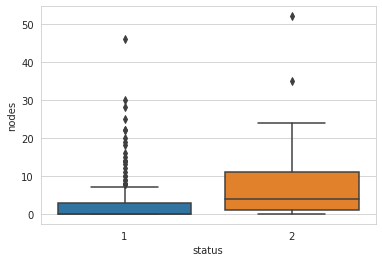

In [17]:
sns.boxplot(x="status",y="nodes", data=data)
plt.show()

if number of nodes greater than 10 then majority of people have survived less than 5 years

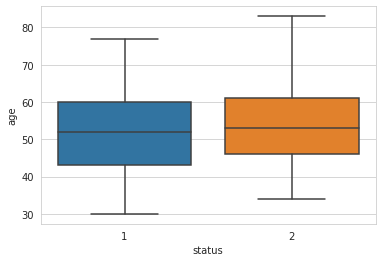

In [18]:
sns.boxplot(x="status",y="age", data=data)
plt.show()

if the age is greater than 75 then majority of people have survived less then 5  years and if age is less than 25 then majority of people have survived more than 5 years

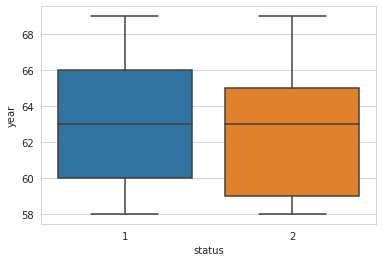

In [19]:
sns.boxplot(x="status",y="year", data=data)
plt.show()

no clear trend

##violin plot

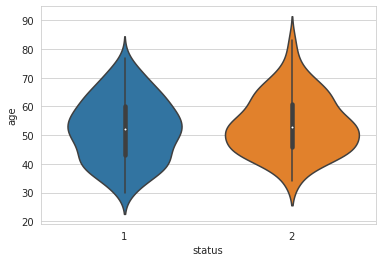

In [20]:
sns.violinplot(x="status",y="age",data = data , size = 8)
plt.show()

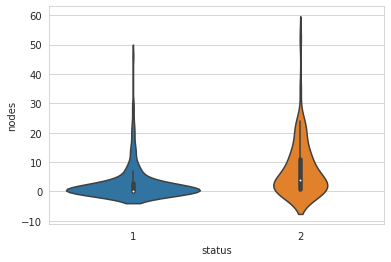

In [21]:
sns.violinplot(x="status",y="nodes",data = data , size = 8)
plt.show()

people having number of auxilliary nodes near to 0 have survived for more than 5 years

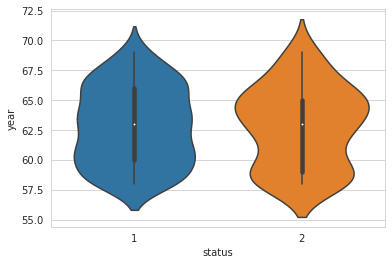

In [22]:
sns.violinplot(x="status",y="year",data = data , size = 8)
plt.show()

no clear trend

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


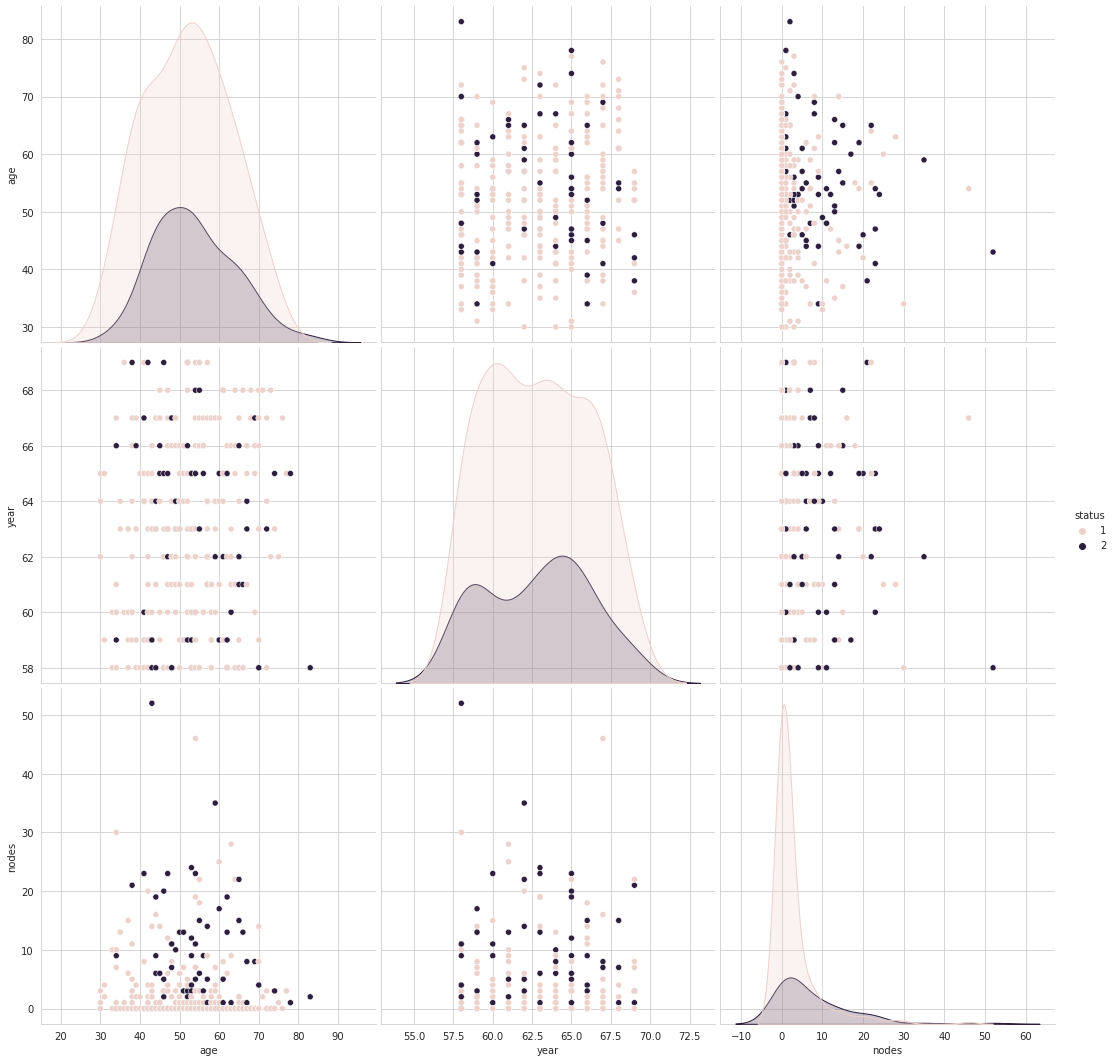

In [23]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data,hue="status",size =5)
plt.show()

observation:-

*   only age vs nodes can be a little bit useful since we can see that pink points are concentrated in the left side tells that lesser the nodes greater is the chance of long survival and people with age less than 40 hasd greater chance of survival
*   so concluding it only age vs nodes was little bit useful and it gives us information that people with age less than 40 and lower number nodes had longer chance of survival
